In [182]:
# calculo taxa de retorno simples

In [356]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

import scipy as stats
import statsmodels.api as sm
import scipy.stats as norm

In [184]:
#ações da
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1') 

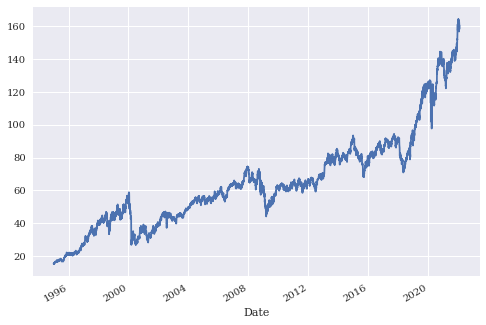

In [185]:
PG['Close'].plot();

In [186]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,7.971124
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.907228
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.795403
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.811378
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.779430


In [187]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-24,164.119995,158.720001,163.429993,161.300003,14846700.0,161.300003
2022-01-25,161.300003,157.889999,160.449997,159.539993,9369600.0,159.539993
2022-01-26,159.570007,156.380005,157.339996,158.149994,10707100.0,158.149994
2022-01-27,161.350006,158.580002,158.729996,159.130005,9083000.0,159.130005
2022-01-28,160.949997,157.320007,158.610001,160.500000,9494200.0,160.500000


In [188]:
# (close(1)/close(0))-1
# pct.change() metodo faz calculo
PG['Retorno-simples'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG

,High,Low,Open,Close,Volume,Adj Close,Retorno-simples
Date,,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,7.971124,NaN
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,7.907228,-0.008016
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,7.795403,-0.014142
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,7.811378,0.002049
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,7.779430,-0.004090
...,...,...,...,...,...,...,...
2022-01-24,164.119995,158.720001,163.429993,161.300003,14846700.0,161.300003,-0.008117
2022-01-25,161.300003,157.889999,160.449997,159.539993,9369600.0,159.539993,-0.010911
2022-01-26,159.570007,156.380005,157.339996,158.149994,10707100.0,158.149994,-0.008713


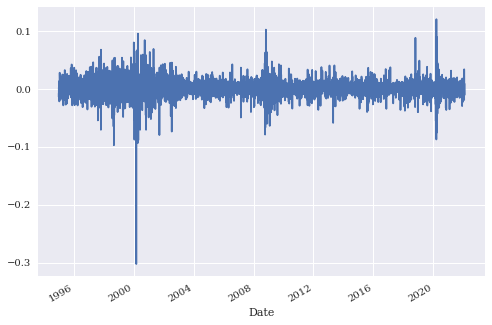

In [189]:
PG['Retorno-simples'].plot();

In [190]:
#configuração da plotagem dos graficos
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

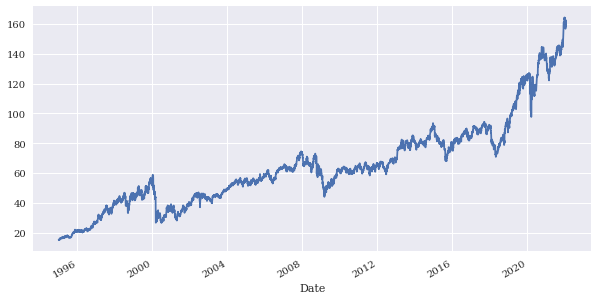

In [191]:
PG['Close'].plot(figsize=(10, 5));

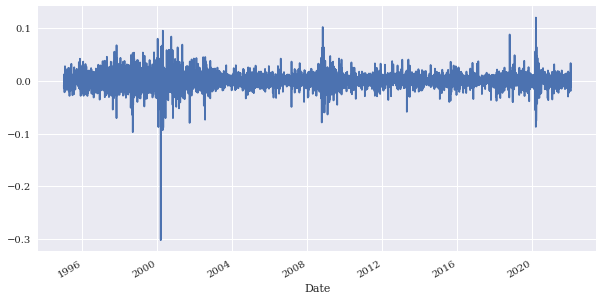

In [192]:
PG['Retorno-simples'].plot(figsize=(10, 5));

In [193]:
# média dos retornos diarios PG
avg_returns_d = PG['Retorno-simples'].mean()
avg_returns_d

0.0005405703522336838

In [194]:
# média dos retornos anuais PG
avg_returns_a = PG['Retorno-simples'].mean() * 250 # média de dias de negociação
avg_returns_a

0.13514258805842094

In [195]:
print( str (round(avg_returns_a, 5) * 100) + ' %')

13.514000000000001 %


In [196]:
# retornos logaritmos 
PG['Retornos-log'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['Retornos-log']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2022-01-24   -0.008150
2022-01-25   -0.010971
2022-01-26   -0.008751
2022-01-27    0.006178
2022-01-28    0.008572
Name: Retornos-log, Length: 6818, dtype: float64

In [197]:
log_return_d = PG['Retornos-log'].mean()
log_return_d

0.0004404383847835712

In [198]:
log_return_a = PG['Retornos-log'].mean() * 250
log_return_a

0.11010959619589279

In [199]:
print( str (round(log_return_a, 5) * 100) + ' %')

11.011 %


In [200]:
# usar retorno simples quando estamos avaliando varias ações ao mesmo tempo
# usar retorno logaritmo quando estamos avaliando uma unica ação

In [201]:
# Calculando retorno de um portifólio

In [202]:
# lista com ticker das ações 
tickers = ['PG', 'MSFT', 'F', 'GE']
dados = pd.DataFrame()

for t in tickers:
    dados[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [203]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6818 entries, 1995-01-03 to 2022-01-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6818 non-null   float64
 1   MSFT    6818 non-null   float64
 2   F       6818 non-null   float64
 3   GE      6818 non-null   float64
dtypes: float64(4)
memory usage: 266.3 KB


In [204]:
dados.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971120,2.374855,4.358236,32.877312
1995-01-04,7.907220,2.392117,4.475500,32.877312
1995-01-05,7.795400,2.352659,4.436411,32.957897
1995-01-06,7.811381,2.392117,4.436411,32.796707
1995-01-09,7.779430,2.377320,4.514588,32.474407


In [205]:
dados.tail()

,PG,MSFT,F,GE
Date,,,,
2022-01-24,161.300003,296.369995,20.389999,96.910004
2022-01-25,159.539993,288.489990,19.980000,91.110001
2022-01-26,158.149994,296.709991,19.910000,89.320000
2022-01-27,159.130005,299.839996,19.549999,89.900002
2022-01-28,160.500000,308.260010,19.540001,92.099998


In [206]:
dados.iloc[0]

PG       7.971120
MSFT     2.374855
F        4.358236
GE      32.877312
Name: 1995-01-03 00:00:00, dtype: float64

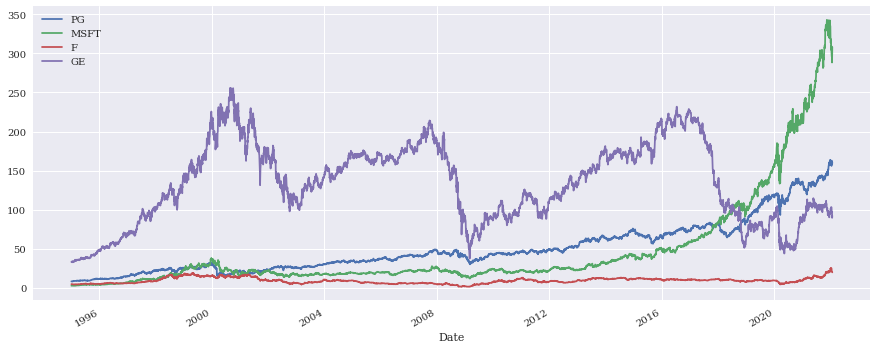

In [207]:
# plotagem sem normalizar
dados.plot(figsize=(15, 6));

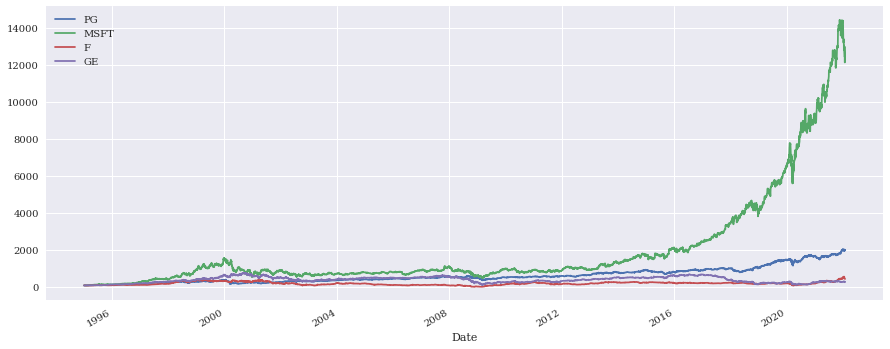

In [208]:
# normalização dos dados base 100
(dados / dados.iloc[0] * 100).plot(figsize=(15, 6));

In [209]:
dados.loc['1995-01-03'] # rótulo

PG       7.971120
MSFT     2.374855
F        4.358236
GE      32.877312
Name: 1995-01-03 00:00:00, dtype: float64

In [210]:
dados.iloc[0] # indice

PG       7.971120
MSFT     2.374855
F        4.358236
GE      32.877312
Name: 1995-01-03 00:00:00, dtype: float64

In [211]:
# calculando retorno do portifólio
retornos = (dados / dados.shift(1)) - 1

In [212]:
retornos.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004891
1995-01-09,-0.004090,-0.006186,0.017622,-0.009827


In [213]:
# lista com pesos 
pesos = np.array([0.25, 0.25, 0.25, 0.25])

In [214]:
# np.dot calcula o produto de um vetor o matriz - produto escalar
np.dot(retornos, pesos)


array([        nan,  0.00653973, -0.00922985, ..., -0.00084236,
        0.00128947,  0.01516279])

In [215]:
anual_retornos = retornos.mean() * 250
anual_retornos

PG      0.135143
MSFT    0.227425
F       0.135093
GE      0.089081
dtype: float64

In [216]:
np.dot(anual_retornos, pesos)

0.1466854904770927

In [217]:
portifolio = str(round(np.dot(anual_retornos, pesos), 5) * 100) + '%'

In [218]:
portifolio

'14.668999999999999%'

In [219]:
# comparando com pesos de outra carteira
pesos_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [220]:
portifolio_2 = str(round(np.dot(anual_retornos, pesos_2), 5) * 100) + '%'

In [221]:
portifolio_2

'16.975%'

In [222]:
print(portifolio)
print(portifolio_2)

14.668999999999999%
16.975%


In [223]:
# indice de açoes 
indices = ['^GSPC', # S&P500
           '^IXIC', # NASDAQ
           '^GDAXI', # DAX alemanha
           '^BVSP', # BOVESP Brasil
           ]

In [224]:
dados_ind = pd.DataFrame()

for i in  indices:
    dados_ind[i] = wb.DataReader(i, data_source='yahoo', start='1997-1-1')['Adj Close']

In [225]:
dados_ind.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6955.500000
1997-01-03,748.030029,1310.680054,2863.260010,6997.799805
1997-01-06,747.650024,1316.400024,2890.199951,7159.500000
1997-01-07,753.229980,1327.729980,2876.340088,7159.500000
1997-01-08,748.409973,1320.349976,2904.080078,7427.000000


In [226]:
dados_ind.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-24,4410.129883,13855.129883,15011.129883,107752.0
2022-01-25,4356.450195,13539.290039,15123.870117,109845.0
2022-01-26,4349.930176,13542.120117,15459.389648,111573.0
2022-01-27,4326.509766,13352.780273,15524.269531,112315.0
2022-01-28,4431.850098,13770.570312,15318.950195,111478.0


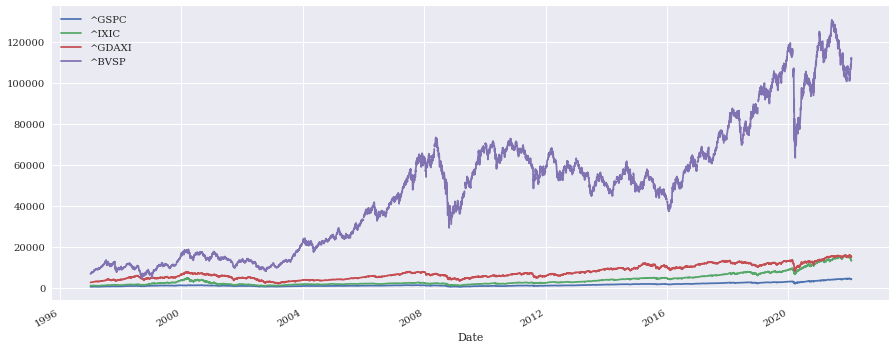

In [227]:
# plotagem sem normalizar 
dados_ind.plot(figsize=(15, 6));

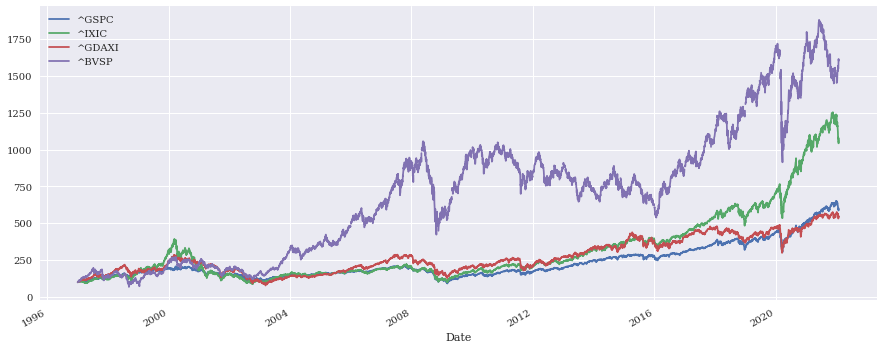

In [228]:
# normalização dos dados base 100
(dados_ind / dados_ind.iloc[0] * 100).plot(figsize=(15, 6));

In [229]:
indices_retornos = (dados_ind / dados_ind.shift(1)) - 1
indices_retornos.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2022-01-24,0.002772,0.006261,-0.037987,-0.009678
2022-01-25,-0.012172,-0.022796,0.007510,0.019424
2022-01-26,-0.001497,0.000209,0.022185,0.015731
2022-01-27,-0.005384,-0.013982,0.004197,0.006650
2022-01-28,0.024348,0.031289,-0.013226,-0.007452


In [230]:
anual_indices_retornos = indices_retornos.mean() * 250
anual_indices_retornos

^GSPC     0.090049
^IXIC     0.125253
^GDAXI    0.079431
^BVSP     0.145865
dtype: float64

In [231]:
# comparação com o melhor indice/ação/indice com pesos iguais DJI
tickers_comp = ['PG', '^GSPC', '^DJI']

comp_precos = pd.DataFrame()

for t in tickers_comp:
    comp_precos[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [232]:
comp_precos.tail()

,PG,^GSPC,^DJI
Date,,,
2022-01-24,161.300003,4410.129883,34364.500000
2022-01-25,159.539993,4356.450195,34297.730469
2022-01-26,158.149994,4349.930176,34168.089844
2022-01-27,159.130005,4326.509766,34160.781250
2022-01-28,160.500000,4431.850098,34725.468750


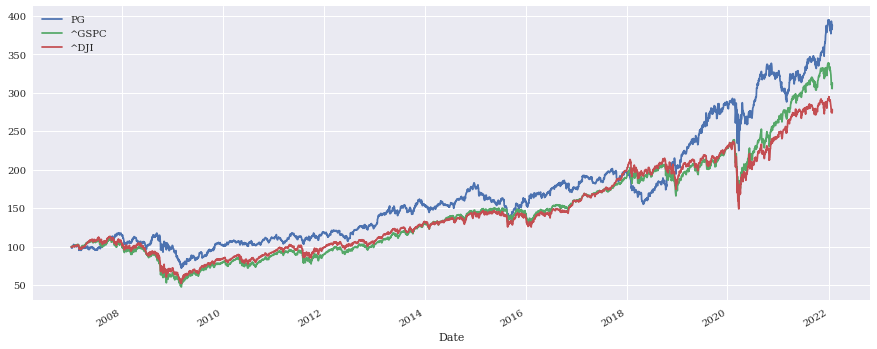

In [233]:
# normalização para ver performace durante um periodo
(comp_precos / comp_precos.iloc[0] * 100).plot(figsize=(15, 6))
plt.show() 

In [234]:
# medindo risco de um ativo

In [235]:
tickers_risco = ['PG', 'BEI.DE']
sec_data = pd.DataFrame()

for t in tickers_risco:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [236]:
sec_data.tail()

,PG,BEI.DE
Date,,
2022-01-24,161.300003,89.800003
2022-01-25,159.539993,92.040001
2022-01-26,158.149994,90.820000
2022-01-27,159.130005,91.459999
2022-01-28,160.500000,88.779999


In [237]:
sec_retornos = np.log(sec_data / sec_data.shift(1))

In [238]:
sec_retornos

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006545
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002203,0.000202
2007-01-09,-0.002518,-0.022858
...,...,...
2022-01-24,-0.008150,-0.006438
2022-01-25,-0.010971,0.024638
2022-01-26,-0.008751,-0.013344


In [239]:
# média diária
sec_retornos['PG'].mean()

0.000357264740095671

In [240]:
# média anual
sec_retornos['PG'].mean() *250

0.08931618502391775

In [241]:
# desvio padrão
sec_retornos['PG'].std()

0.011711560276523559

In [242]:
# anualizando desvio padrão
sec_retornos['PG'].std() *250 **0.5 # desvio padrão é a raiz quadrada da variancia

0.18517602714082929

In [243]:
sec_retornos['BEI.DE'].mean()

0.00018246191692629498

In [244]:
sec_retornos['BEI.DE'].mean() *250

0.04561547923157375

In [245]:
sec_retornos['BEI.DE'].std()

0.013692064057201156

In [246]:
sec_retornos['BEI.DE'].std() *250 **0.5

0.21649054144840818

In [247]:
print(sec_retornos['PG'].mean() *250)
print(sec_retornos['BEI.DE'].mean() *250)

0.08931618502391775
0.04561547923157375


In [248]:
sec_retornos[['PG', 'BEI.DE']].mean() *250

PG        0.089316
BEI.DE    0.045615
dtype: float64

In [249]:
sec_retornos[['PG', 'BEI.DE']].std() *250 *0.5

PG        1.463945
BEI.DE    1.711508
dtype: float64

In [250]:
# calculando Covariancia e correlação
PG_var = sec_retornos['PG'].var()

In [251]:
BEI_var = sec_retornos['BEI.DE'].var()

In [252]:
PG_var = sec_retornos['PG'].var() *250

In [253]:
BEI_var = sec_retornos['BEI.DE'].var() *250

In [254]:
# calculo de covariancia em uma tabela de valores
cov_matrix = sec_retornos.cov()
cov_matrix

,PG,BEI.DE
PG,0.000137,0.000043
BEI.DE,0.000043,0.000187


In [255]:
cov_matrix_a = sec_retornos.cov() *250
cov_matrix_a

,PG,BEI.DE
PG,0.034290,0.010741
BEI.DE,0.010741,0.046868


In [256]:
# calculo ccorrelação
corr_matrix = sec_retornos.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.267537
BEI.DE,0.267537,1.000000


In [257]:
# não devemos anualizar a tabela de correção

In [258]:
# calculo risco portifolio
pesos_3 = np.array([0.5, 0.5])

In [259]:
portifolio_var = np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))
portifolio_var

0.025659914126576245

In [260]:
# volatilidade portifolio
portifolio_vol = (np.dot(pesos_3.T, np.dot(sec_retornos.cov() *250, pesos_3))) **0.5
portifolio_vol

0.16018712222452916

In [261]:
print(str(round(portifolio_vol, 5) *100) + ' %')

16.019 %


In [262]:
# calculando risco de portifólio diversificado e não diversificado
# risco diversificado == variancia do portifolio - variancia anual ponderada
PG_var_a = sec_retornos[['PG']].var() *250
PG_var_a

PG    0.03429
dtype: float64

In [263]:
BEI_var_a = sec_retornos[['BEI.DE']].var() *250
BEI_var_a

BEI.DE    0.046868
dtype: float64

In [264]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

BEI.DE   NaN
PG       NaN
dtype: float64

In [265]:
float(PG_var_a)

0.03429016102766115

In [266]:
PG_var_a = sec_retornos['PG'].var() *250
PG_var_a

0.03429016102766115

In [267]:
BEI_var_a = sec_retornos['BEI.DE'].var() *250
BEI_var_a

0.046868154536624934

In [268]:
risco_div = portifolio_var - (pesos_3[0] **2 * PG_var_a) - (pesos_3[1] **2 * BEI_var_a)
risco_div

0.005370335235504724

In [269]:
print(str(round(risco_div *100, 3)) + ' %')

0.537 %


In [270]:
n_dr_1 = portifolio_var - risco_div
n_dr_1 = round(n_dr_1, 10)
n_dr_1

0.0202895789

In [271]:
n_dr_2 = (pesos_3[0] **2 *PG_var_a) + (pesos_3[1] **2 *BEI_var_a)
n_dr_2 = round(n_dr_2, 10)
n_dr_2

0.0202895789

In [272]:
n_dr_1 == n_dr_2

True

In [273]:
# Regressão para analise financeira
# uso do arquivo Housing.xlsx

In [274]:
# libs para regressão

In [275]:
data = pd.read_excel('../arquivos/Housing.xlsx')

In [276]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


In [277]:
data[['House Price', 'House Size (sq.ft.)']].head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


In [278]:
x = data['House Size (sq.ft.)']
y = data['House Price']

In [279]:
x.head()

0    1940
1    1300
2    1420
3    1680
4    1270
Name: House Size (sq.ft.), dtype: int64

In [280]:
y.head()

0    1116000
1     860000
2     818400
3    1000000
4     640000
Name: House Price, dtype: int64

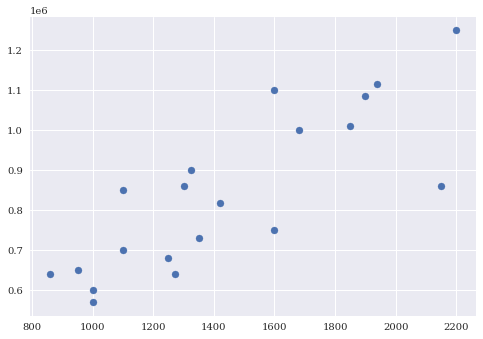

In [281]:
plt.scatter(x, y)
plt.show();

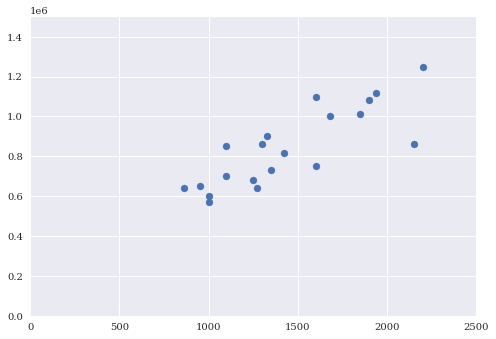

In [282]:
# importante definir valores comparativos(0 ponto inicial, um pouco depois do ponto final)
# plt.axis definem valores do grafico
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.show();

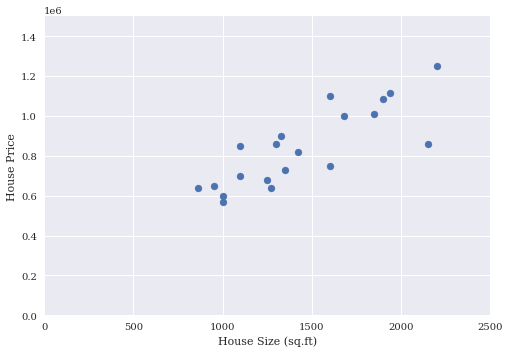

In [283]:
# gráficos devem ter legendas para melhor entendimento
plt.scatter(x, y)
plt.axis([0,2500, 0, 1500000])
plt.xlabel('House Size (sq.ft)')
plt.ylabel('House Price')
plt.show();

In [284]:
# calculando alpha, beta, r^2

In [285]:
X1 = sm.add_constant(x)

reg = sm.OLS(y, X1).fit()

In [286]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           8.13e-06
Time:                        10:43:46   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [287]:
# usando a lib do scipy
slope, intercept, r_value, p_value, std_err = stats.stats.linregress(x, y)

In [288]:
print(slope)
print(intercept)
print(r_value)
print(r_value **2)
print(p_value)
print(std_err)

401.91628631922595
260806.2360560964
0.8235775534696924
0.678279986579124
8.129642377231308e-06
65.24299510636492


In [289]:
# otimização portifolio de markowitz 
# fronteira eficiente

In [290]:
assets = ['PG', '^GSPC']
portifolio_3 =  pd.DataFrame()
for a in assets:
    portifolio_3[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [291]:
portifolio_3.tail()

,PG,^GSPC
Date,,
2022-01-24,161.300003,4410.129883
2022-01-25,159.539993,4356.450195
2022-01-26,158.149994,4349.930176
2022-01-27,159.130005,4326.509766
2022-01-28,160.500000,4431.850098


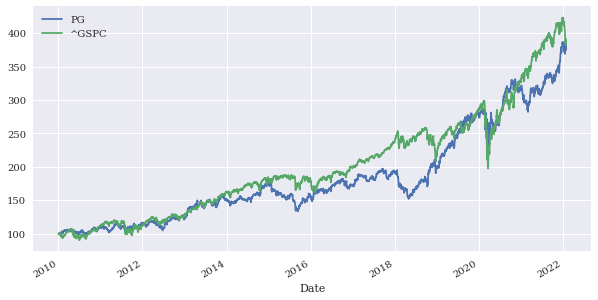

In [292]:
(portifolio_3 / portifolio_3.iloc[0] *100).plot(figsize=(10, 5));

In [293]:
log_ret_port = np.log(portifolio_3 / portifolio_3.shift(1))

In [294]:
log_ret_port.mean() *250

PG       0.109816
^GSPC    0.112204
dtype: float64

In [295]:
log_ret_port.cov() *250

,PG,^GSPC
PG,0.028505,0.016770
^GSPC,0.016770,0.029481


In [296]:
log_ret_port.corr()

,PG,^GSPC
PG,1.000000,0.578508
^GSPC,0.578508,1.000000


In [297]:
num_assets = len(assets)
num_assets

2

In [298]:
arr = np.random.random(2)
arr

array([0.40547004, 0.69210703])

In [299]:
arr[0] + arr[1]

1.0975770694469063

In [300]:
pesos_4 = np.random.random(num_assets)
pesos_4 /= np.sum(pesos_4)
pesos_4

array([0.24977048, 0.75022952])

In [301]:
pesos_4[0] + pesos_4[1]

1.0

In [302]:
# expectativa de rotorno do portifólio

In [303]:
np.sum(pesos_4 *log_ret_port.mean()) *250

0.1116077657779108

In [304]:
# expectativa de variancia do portifólio
np.dot(pesos_4.T, np.dot(log_ret_port.cov() *250, pesos_4))

0.024656630437277244

In [305]:
# expectativa de volatilidade
np.sqrt(np.dot(pesos_4.T, np.dot(log_ret_port.cov() *250, pesos_4)))

0.15702429887529268

In [306]:
port_ret = []
port_vol = []
for x in range(1000):
    w = np.random.random(num_assets)
    w /= np.sum(w)
    port_ret.append(np.sum(w * log_ret_port.mean()) *250)
    port_vol.append(np.sqrt(np.dot(w.T, np.dot(log_ret_port.cov() *250, w))))

port_ret, port_vol

([0.11058507671850627,
  0.11094938124112531,
  0.11212522684479972,
  0.11069878593358047,
  0.11092433738312821,
  0.11068869028387299,
  0.1105938932229411,
  0.1108808149700298,
  0.11082977996676428,
  0.11181651529896619,
  0.11193248417712333,
  0.11067087676901355,
  0.11156077180264246,
  0.10990429924849801,
  0.11160520990002352,
  0.11061521702404836,
  0.11070809334714417,
  0.11081184255942866,
  0.11181060695680366,
  0.11101200467197302,
  0.1104822450205505,
  0.11087447566278276,
  0.11045952513309118,
  0.1108544113409279,
  0.11055344623578094,
  0.11127750668294127,
  0.11160405466005455,
  0.11214735811467948,
  0.11071867094259664,
  0.11099545266303514,
  0.11090682475240941,
  0.1102776052781722,
  0.11080438471536655,
  0.11077945761199204,
  0.11043371922293403,
  0.10986882941226739,
  0.11220298835599658,
  0.11134038807168649,
  0.11075362809055339,
  0.1104330371694432,
  0.11177768232168368,
  0.11192424787465143,
  0.10994631009979995,
  0.1111156459441

In [307]:
port_ret = []
port_vol = []
for x in range(500): # inicialmente usar 1000
    w = np.random.random(num_assets)
    w /= np.sum(w)
    port_ret.append(np.sum(w * log_ret_port.mean()) *250)
    port_vol.append(np.sqrt(np.dot(w.T, np.dot(log_ret_port.cov() *250, w))))

port_ret = np.array(port_ret)
port_vol = np.array(port_vol)

port_ret, port_vol

(array([0.11017786, 0.11160525, 0.10993851, 0.11114889, 0.11188651,
        0.1113602 , 0.11153179, 0.11136048, 0.11070652, 0.11172321,
        0.11159416, 0.11006595, 0.11122437, 0.11141006, 0.11141493,
        0.11067199, 0.1103809 , 0.1104485 , 0.10985296, 0.11215574,
        0.1105484 , 0.11146856, 0.11200768, 0.11126554, 0.11108634,
        0.11138935, 0.1111053 , 0.11175361, 0.1102427 , 0.11098036,
        0.11120167, 0.11159382, 0.11108916, 0.11090109, 0.11098097,
        0.11218513, 0.11122789, 0.11056005, 0.11105879, 0.10988371,
        0.1120776 , 0.11019744, 0.11173504, 0.11043505, 0.11181434,
        0.11071759, 0.11001117, 0.11145716, 0.11000496, 0.11148532,
        0.11055683, 0.11203416, 0.11057913, 0.11118398, 0.11017845,
        0.11005752, 0.11199074, 0.11200164, 0.11046064, 0.11060948,
        0.11198594, 0.11138398, 0.11053808, 0.11012135, 0.11054321,
        0.11055667, 0.11161324, 0.11175651, 0.11059242, 0.11139175,
        0.11089809, 0.11081035, 0.11115867, 0.11

In [308]:
portifolios = pd.DataFrame({'Retornos': port_ret, 'Volatilidade': port_vol})

In [309]:
portifolios.head()

,Retornos,Volatilidade
0,0.110178,0.159713
1,0.111605,0.156980
2,0.109939,0.165415
3,0.111149,0.151727
4,0.111887,0.162883


In [310]:
portifolios.tail()

,Retornos,Volatilidade
495,0.111853,0.162073
496,0.110727,0.152014
497,0.110638,0.152721
498,0.110758,0.151824
499,0.111748,0.159736


Text(0, 0.5, 'Retornos Expectativa')

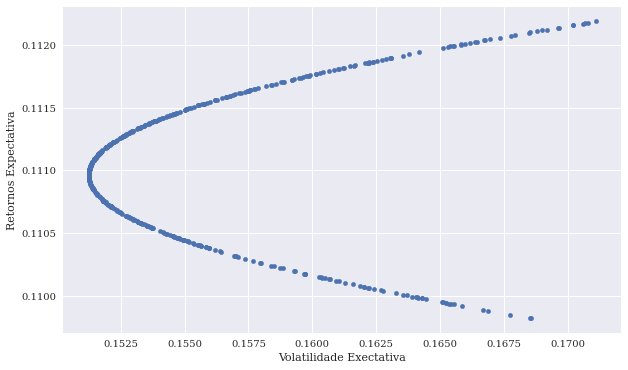

In [311]:
portifolios.plot(x='Volatilidade', y='Retornos', kind='scatter', figsize=(10, 6))
plt.xlabel('Volatilidade Exectativa')
plt.ylabel('Retornos Expectativa')

In [312]:
# modelos de precificação de ativos(CAPM)

In [313]:
# calculo do Beta de uma ação
# beta calculado com base nos ultimos 5 anos
tks = ['PG', '^GSPC']
portifolio_4 =  pd.DataFrame()
for t in tks:
    portifolio_4[t] = wb.DataReader(t, data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close'] 

In [314]:
sec_retorns = np.log( portifolio_4 / portifolio_4.shift(1))

In [315]:
cov = sec_retorns.cov() *250
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [316]:
cov_mercado = cov.iloc[0 ,1]
cov_mercado

0.010078086665578174

In [317]:
mercado_var = sec_retorns['^GSPC'].var() *250
mercado_var

0.016361631002308474

In [318]:
PG_beta = cov_mercado / mercado_var
PG_beta

0.6159585596421439

In [319]:
# calculo o retorno esperado de P&G(CAPM)
PG_er = 0.025 + PG_beta * 0.05
PG_er

0.0557979279821072

In [320]:
# calculo indice sharpe
sharpe = (PG_er - 0.025) / (sec_retorns['PG'].std() *250 ** 0.5)
sharpe

0.21558106774147445

In [321]:
# Analise Regressão Multivariada
# data => dados dos preços de casas
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [322]:
# teste com 3 variaveis
x = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
y = data['House Price']

In [323]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           6.82e-05
Time:                        10:43:57   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
# teste com 2 variaveis
x = data[['House Size (sq.ft.)', 'Number of Rooms']]
y = data['House Price']

In [325]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           5.77e-05
Time:                        10:43:57   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
# teste com 2 variaveis
x = data[['Number of Rooms', 'Year of Construction']]
y = data['House Price']

In [327]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           6.79e-05
Time:                        10:43:57   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
# simulações de monte carlo

In [329]:
# previsão de lucro bruto futuro
rev_m = 170 # receita esperada da empresa em milions, receita média
rev_stdev = 20 # desvio padrão de 20 milions 
interations = 1000

In [330]:
rev = np.random.normal(rev_m, rev_stdev, interations)
rev

array([175.61928584, 181.41056212, 145.89588681, 161.34548697,
       136.67981796, 166.0538501 , 200.04689533, 181.81936776,
       149.00424741, 174.22067141, 156.11185771, 136.55209501,
       154.87327996, 127.0057886 , 165.77063967, 160.23790169,
       175.71862748, 171.34375383, 156.54632157, 161.0699629 ,
       206.24244558, 194.31554519, 150.76417295, 187.40887201,
       186.68299787, 162.94575226, 151.84555974, 187.78848394,
       139.20641794, 177.51478925, 159.44104291, 193.01869906,
       146.1949458 , 164.80870956, 172.84270929, 155.82268002,
       166.15008529, 166.20888316, 183.53344913, 235.47891   ,
       137.96754006, 173.8781066 , 172.15405636, 174.81625461,
       178.3570569 , 175.36428063, 147.55041214, 150.39220983,
       172.31418308, 167.58299365, 201.9645894 , 142.15675176,
       182.07107011, 177.99183542, 172.33803242, 163.99204995,
       144.83931615, 153.37816052, 178.89597298, 182.02076407,
       188.21387988, 159.16524448, 132.40133698, 183.00

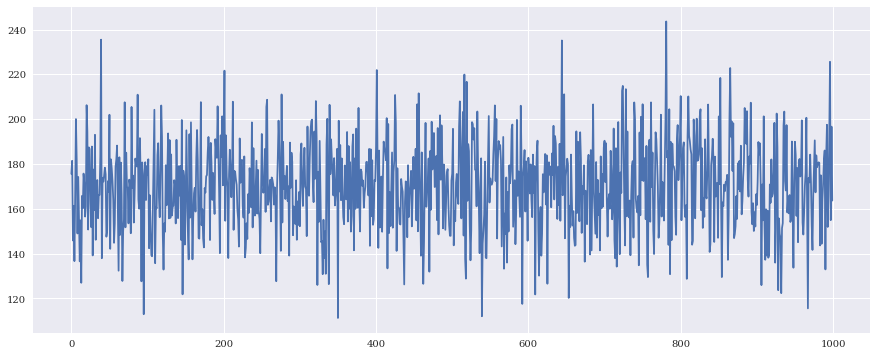

In [331]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

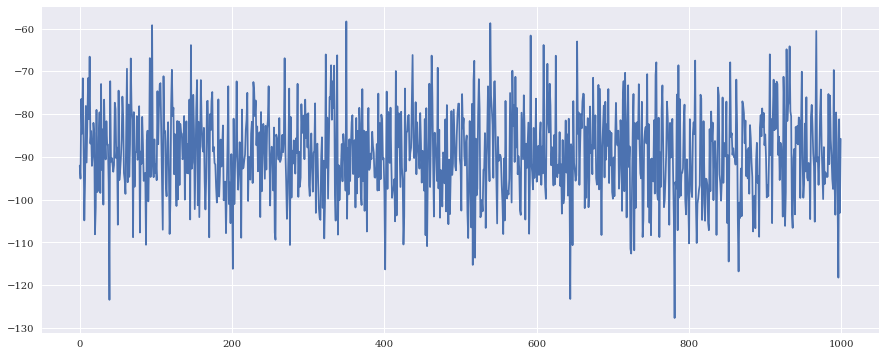

In [332]:
COGS = - (rev *np.random.normal(0.6, 0.1))

plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

In [333]:
COGS.mean()

-89.17885873847884

In [334]:
COGS.std()

10.459359821779852

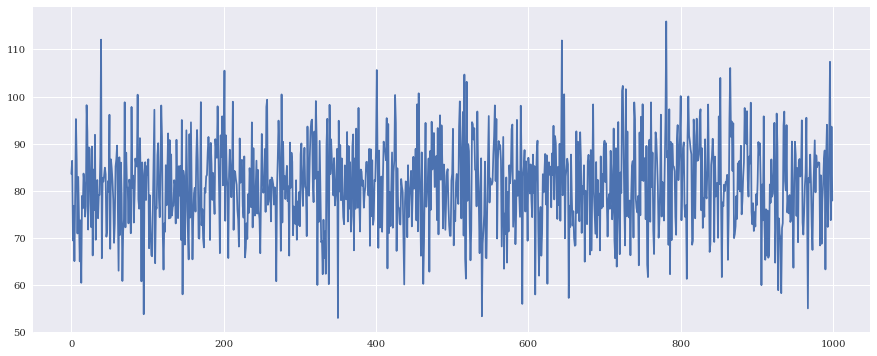

In [335]:
Gross_profit = rev + COGS
Gross_profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_profit)
plt.show()

In [336]:
max(Gross_profit)

115.93974259786191

In [337]:
min(Gross_profit)

52.974657254663676

In [338]:
Gross_profit.mean()

80.99614134135207

In [339]:
Gross_profit.std()

9.499648217626321

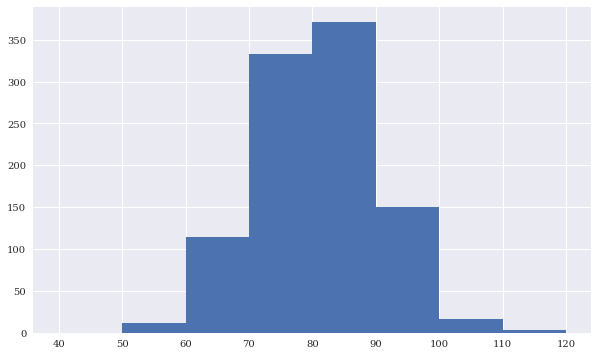

In [340]:
plt.figure(figsize=(10, 6))
plt.hist(Gross_profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.show()

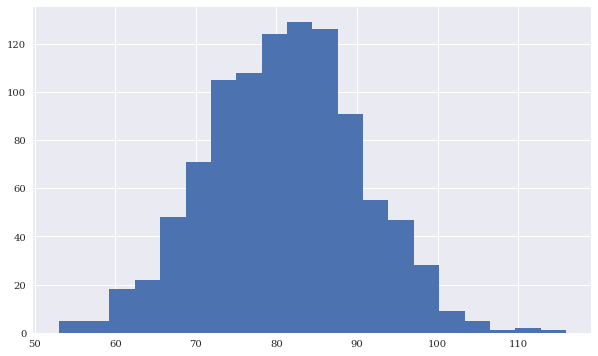

In [341]:
plt.figure(figsize=(10, 6))
plt.hist(Gross_profit, bins=20)
plt.show()

In [553]:
# previsão de ativos usando monte carlo
tik = 'PG'
data = pd.DataFrame()
data[tik] = wb.DataReader(tik, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [554]:
log_ret = np.log(1 + data.pct_change())

In [555]:
log_ret.tail()

,PG
Date,
2017-03-15,0.004386
2017-03-16,0.000438
2017-03-17,-0.004823
2017-03-20,0.002415
2017-03-21,-0.000329


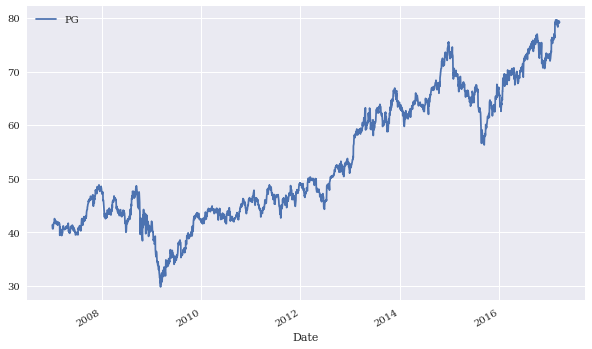

In [556]:
data.plot(figsize=(10, 6));

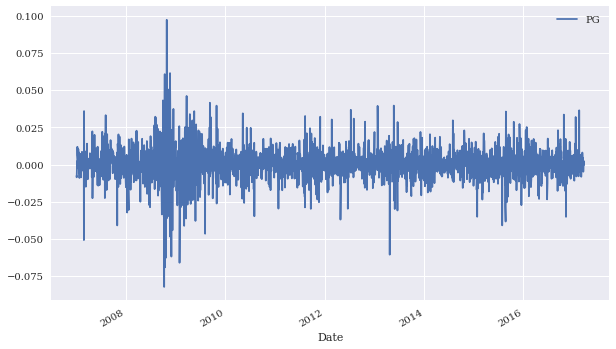

In [557]:
log_ret.plot(figsize=(10, 6));

In [558]:
u = log_ret.mean()
u

PG    0.000253
dtype: float64

In [559]:
var = log_ret.var()
var

PG    0.000125
dtype: float64

In [560]:
drift = u - (0.5 *var)
drift

PG    0.000191
dtype: float64

In [561]:
stdev = log_ret.std()
stdev

PG    0.011166
dtype: float64

In [562]:
type(drift)

pandas.core.series.Series

In [563]:
type(stdev)

pandas.core.series.Series

In [564]:
np.array(drift)

array([0.0001907])

In [565]:
drift.values

array([0.0001907])

In [566]:
norm.norm.ppf(0.95)

1.6448536269514722

In [567]:
x = np.random.rand(10, 2)
x

array([[0.21590156, 0.7278009 ],
       [0.73095971, 0.59967363],
       [0.57958712, 0.7327029 ],
       [0.76013572, 0.06322259],
       [0.27448869, 0.96275498],
       [0.04012608, 0.34298088],
       [0.77896651, 0.48408244],
       [0.02318603, 0.25505747],
       [0.77148599, 0.92858793],
       [0.95822582, 0.27081675]])

In [568]:
norm.norm.ppf(x)

array([[-0.78610989,  0.60617552],
       [ 0.61571811,  0.25250243],
       [ 0.20083733,  0.62100825],
       [ 0.70673922, -1.52827139],
       [-0.59929321,  1.78359163],
       [-1.7492248 , -0.40434131],
       [ 0.7687075 , -0.03990999],
       [-1.99199081, -0.65865872],
       [ 0.74374952,  1.46535478],
       [ 1.73045863, -0.61034468]])

In [569]:
z = norm.norm.ppf(np.random.rand(10, 2))
z

array([[ 0.76528055,  2.21279305],
       [ 0.48401392, -0.66176579],
       [-0.11965606, -1.24855567],
       [ 0.58474388, -1.76652887],
       [ 0.02142042, -0.48079223],
       [ 0.2508449 ,  2.00970822],
       [-0.14987741, -1.86933304],
       [ 1.15033943, -0.04022647],
       [-0.72677399, -0.59475053],
       [-0.82797335,  0.48534716]])

In [570]:
t_intervals = 10  # teste inicial para 1000 dias
interations = 10

In [571]:
norm.norm.ppf(np.random.rand(t_intervals, interations))

array([[-0.07410161, -0.46907352,  0.12130109,  0.43408691,  1.47843076,
         0.45138321, -3.15289705,  0.74999334, -0.32995233,  1.61491892],
       [-0.49740117,  1.05029231,  1.01637463,  0.15152805,  0.12625982,
        -0.61323486,  0.01899548, -1.15928987,  0.52299094,  0.37198652],
       [-0.29009035, -1.05161791,  0.07412866,  1.35303151, -1.71450649,
        -1.58467474, -0.52179449, -0.14067164, -0.80541186, -0.16683532],
       [ 0.59904233, -0.82976885, -1.01916059, -0.66132153,  0.29525815,
         0.33440133, -2.15085123, -0.70138288,  1.41562961, -0.4418216 ],
       [ 0.64106233,  1.38044393,  0.74353596,  1.18368239, -0.86319665,
        -2.71519611, -1.31987698,  0.58907732, -0.65804371, -0.35912068],
       [ 0.11694687,  0.07993775, -0.7605751 , -0.81661065, -0.88704675,
        -0.0110369 , -1.1587717 , -0.19215124, -0.58154738,  0.40513173],
       [ 1.71750472, -0.41797187,  1.11687018, -0.24964397, -0.95135822,
        -0.28465646,  0.15134415,  0.57129914

In [572]:
daily_returns = np.exp(drift.values + stdev.values * norm.norm.ppf(np.random.rand(t_intervals, interations)))

In [573]:
daily_returns

array([[0.99106357, 1.00265535, 0.98373674, 1.00228823, 1.00915514,
        0.99614109, 1.00887062, 1.00447529, 0.99753084, 1.01560524],
       [0.99959359, 1.00573878, 0.97167863, 1.00843935, 0.98989119,
        0.996003  , 0.99373749, 0.9884704 , 1.00445949, 1.00587719],
       [0.98832051, 0.99256283, 0.99540498, 1.00413337, 0.99325448,
        1.0027534 , 1.00595266, 0.96729327, 0.99479245, 1.00652267],
       [1.00520969, 0.9824805 , 0.99490054, 1.00242013, 0.9704788 ,
        0.99777908, 0.99059152, 1.008509  , 1.02961502, 0.99287076],
       [1.013547  , 1.00631804, 1.01723337, 1.01459851, 1.00599588,
        1.0081501 , 1.00850655, 1.00062049, 1.00248795, 0.9927433 ],
       [1.00406624, 0.9830885 , 0.99827294, 1.01183026, 1.00376657,
        1.00389107, 0.99782885, 1.0064073 , 0.99947258, 0.99827599],
       [0.98730445, 0.99953312, 1.01923757, 1.00129168, 0.99670578,
        1.0060132 , 0.99007364, 0.99745204, 1.00043807, 0.99187683],
       [1.0157104 , 1.00044382, 0.9968771

In [574]:
s0 = data.iloc[-1]
s0

PG    79.284248
Name: 2017-03-21 00:00:00, dtype: float64

In [575]:
price_list = np.zeros_like(daily_returns)

In [576]:
price_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [577]:
price_list[0] = s0
price_list

array([[79.28424835, 79.28424835, 79.28424835, 79.28424835, 79.28424835,
        79.28424835, 79.28424835, 79.28424835, 79.28424835, 79.28424835],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [578]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] *daily_returns[t]

In [579]:
price_list

array([[79.28424835, 79.28424835, 79.28424835, 79.28424835, 79.28424835,
        79.28424835, 79.28424835, 79.28424835, 79.28424835, 79.28424835],
       [79.25202664, 79.73924309, 77.03881001, 79.95335548, 78.4827789 ,
        78.9673494 , 78.78773004, 78.37013277, 79.63781584, 79.7502167 ],
       [78.32640364, 79.14620891, 76.68481492, 80.28383228, 77.9533718 ,
        79.18477841, 79.25672659, 75.80690199, 79.22309788, 80.27040095],
       [78.73445987, 77.75960726, 76.2937634 , 80.47812952, 75.65209441,
        79.00891573, 78.51104156, 76.45194298, 81.56929123, 79.69813424],
       [79.8010758 , 78.25089577, 77.60856238, 81.65299035, 76.10569506,
        79.65284616, 79.17889978, 76.49938071, 81.77223135, 79.11978916],
       [80.12556595, 76.92755558, 77.47452793, 82.61896684, 76.39235218,
        79.96278082, 79.00699048, 76.98953516, 81.72910264, 78.98338554],
       [79.1083281 , 76.89163972, 78.96494965, 82.72568402, 76.14069859,
        80.44361294, 78.22273851, 76.79336879

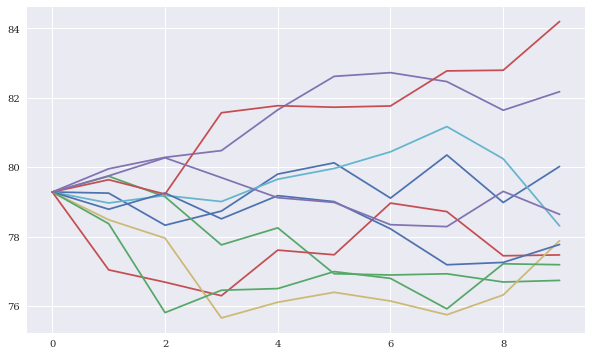

In [580]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);

In [581]:
# formula de black-scholes-merton

In [582]:
def d1(S, K, r , stdev, T):
    return (np.log( S/ K ) + (r + stdev **2 /2 ) *T) / (stdev *np.sqrt(T))

In [583]:
def d2(S, K, r , stdev, T):
    return (np.log( S/ K ) + (r - stdev **2 /2 ) *T) / (stdev *np.sqrt(T))

In [584]:
norm.norm.cdf(0)

0.5

In [585]:
norm.norm.cdf(0.25)

0.5987063256829237

In [586]:
norm.norm.cdf(0.75)

0.7733726476231317

In [587]:
norm.norm.cdf(9)

1.0

In [588]:
def BSM(S, K, r , stdev, T):
    return (S *norm.norm.cdf(d1(S, K, r, stdev, T))) - (K *np.exp(-r *T) *norm.norm.cdf(d2(S, K, r, stdev, T)))

In [589]:
data

,PG
Date,
2007-01-03,41.366619
2007-01-04,41.052567
2007-01-05,40.700027
2007-01-08,40.789776
2007-01-09,40.687225
...,...
2017-03-15,79.466827
2017-03-16,79.501602
2017-03-17,79.119064


In [590]:
S = data.iloc[-1]
S

PG    79.284248
Name: 2017-03-21 00:00:00, dtype: float64

In [591]:
log_ret = np.log(1 + data.pct_change())

In [592]:
stdev = log_ret.std() *250 **0.5
stdev

PG    0.17655
dtype: float64

In [593]:
r = 0.025
K = 110.0
T = 1

In [594]:
d1(S, K, r, stdev, T)

PG   -1.624784
dtype: float64

In [595]:
d2(S, K, r, stdev, T)

PG   -1.801334
dtype: float64

In [596]:
BSM(S, K, r, stdev, T)

PG    0.287586
Name: 2017-03-21 00:00:00, dtype: float64

In [597]:
# discretização de Euler

In [599]:
data.tail()

,PG
Date,
2017-03-15,79.466827
2017-03-16,79.501602
2017-03-17,79.119064
2017-03-20,79.310341
2017-03-21,79.284248


In [602]:
# taxa livre de risco
r = 0.025

In [601]:
stdev

PG    0.17655
dtype: float64

In [603]:
type(stdev)

pandas.core.series.Series

In [605]:
stdev = stdev.values

In [608]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals
interations = 10000

In [612]:
Z = np.random.standard_normal((t_intervals + 1, interations))
S = np.zeros_like(z)
S0 = data.iloc[-1]
S[0] = s0

In [613]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] *np.exp((r -0.5 *stdev **2) * delta_t + stdev * delta_t **0.5 *Z[t])

In [614]:
S

array([[79.28424835, 79.28424835, 79.28424835, ..., 79.28424835,
        79.28424835, 79.28424835],
       [79.39387542, 80.17805345, 79.99335691, ..., 79.6158967 ,
        79.17152855, 79.63938131],
       [78.56987906, 80.82639704, 81.09733373, ..., 80.48811189,
        79.02716465, 78.14474181],
       ...,
       [96.76436363, 68.63854308, 93.40464681, ..., 67.23366521,
        77.51049891, 87.88993285],
       [96.39117247, 67.04450118, 93.54395012, ..., 67.80763386,
        78.24212073, 86.79288725],
       [96.9525662 , 65.91370675, 94.26990366, ..., 67.99497662,
        77.91834531, 87.72555723]])

In [615]:
S.shape

(251, 10000)

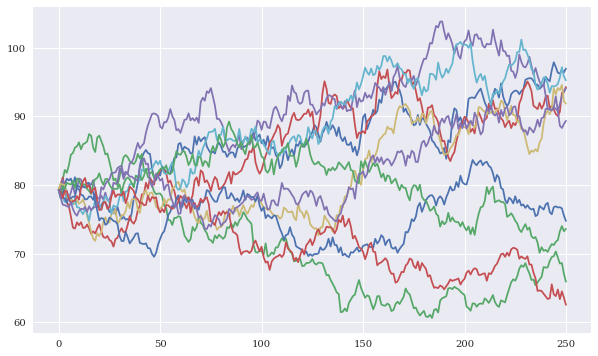

In [616]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [621]:
P = np.maximum(S[-1] - 110, 0)

In [622]:
P

array([0., 0., 0., ..., 0., 0., 0.])

In [623]:
P.shape

(10000,)

In [625]:
interations

10000

In [624]:
C = np.exp(-r *T) * np.sum(P) / interations
C

0.29281471878465987